<h1><center>Variable analysis</center></h1>

This script presents the exploration of the database variables and selects those that may provide useful information for model creation. The strategies to evaluate the variables of higher value are:
- The quantity of missing data.
- the linear relationships of continuous variables.
- Variance

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#load credit card's database
credit_data = pd.read_csv("./data/default_of_credit_card_clients.csv", sep=",")
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<h3><center>Missing data</center></h3>

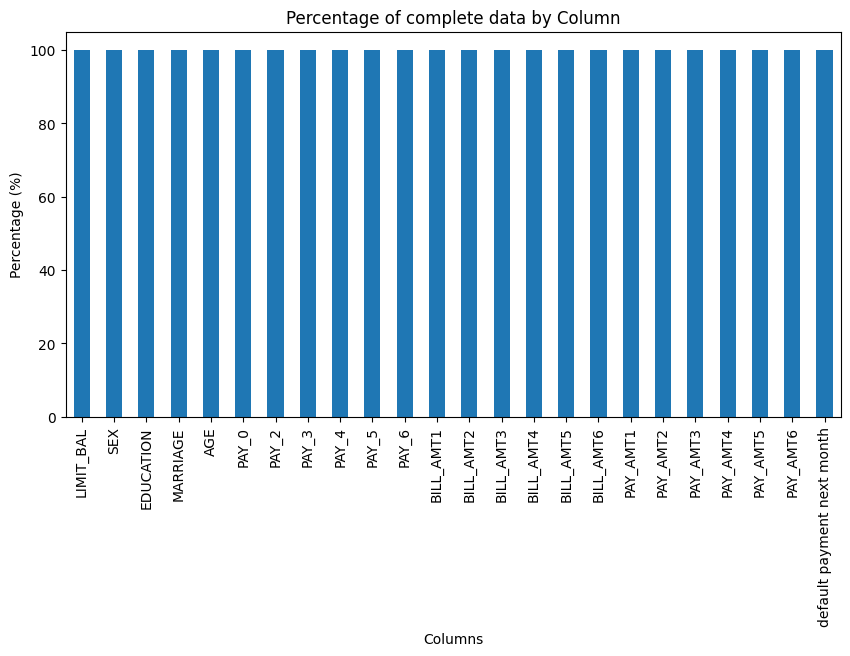

In [11]:
#Columns to verify missing data:
variables= list(credit_data.columns)
variables.remove("ID")
# calculate percentage of missing data in each column
missing_perc = 100 - (credit_data[variables].isna().mean()*100)

# create a bar plot of missing data percentage for each column
fig, ax = plt.subplots(figsize=(10,5))
missing_perc.plot(kind='bar', ax=ax)
ax.set_title('Percentage of complete data by Column')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage (%)')
plt.show()

#### Conclusion 1: The database doesn't have missing data

<h3><center>Correlation</center></h3>

In [28]:
def plot_heat_map(correlation_matrix: pd.DataFrame, name: str):
    """draw correlation matrix

    Args:
        correlation_matrix (pd.DataFrame): correlartion matriz
        name (str): name of graph
    """

    correlation_matrix= correlation_matrix.copy()
    f, ax = plt.subplots(figsize=(10, 8))
    corr = correlation_matrix.replace(0, np.nan)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    sns.heatmap(corr,
    cmap="Greens",
        vmin=-1.0, vmax=1.0,linewidths=1,
        square=True, ax=ax, annot = True)
    f.suptitle(name)

In [29]:
#Continuos variabales
continuos_variables = ["LIMIT_BAL","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]
#Correlation matrix
corr= credit_data[continuos_variables].corr()
#Mask to improve the image's visualisation
mask_lower= np.tril(np.ones_like(corr, dtype=bool), k=-1)
corr = corr.mask(mask_lower,0)


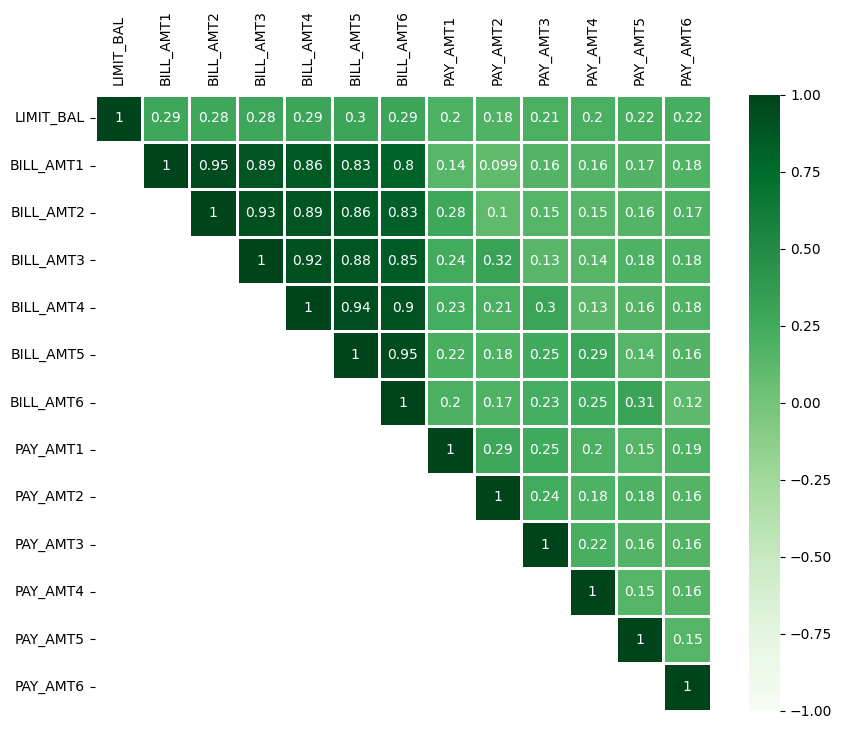

In [31]:
plot_heat_map(corr," ")

#### Conclusion 2: there are a linear relation between amount of bill statement these it's due to the nature of problem. Let's join all variables with central statistical measura, median.

<h3><center>Categorical variables</center></h3>

One way to measure categorical variables impact is judge the information about them variance. it's mean how many times appear in variable. Note: its neccesary keep the balance's database in the conclusion

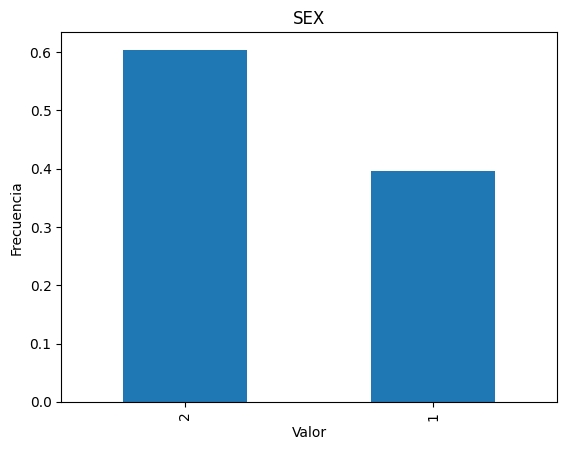

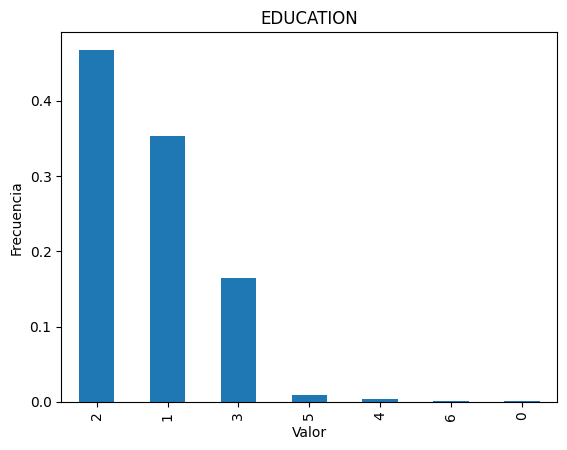

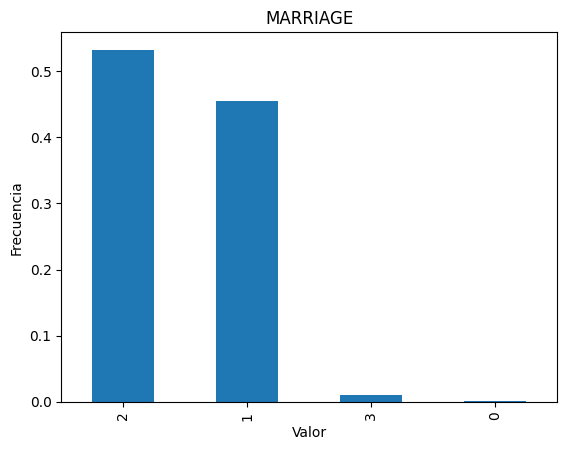

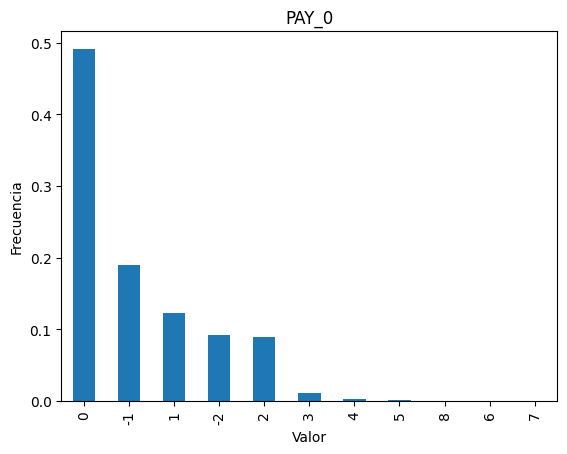

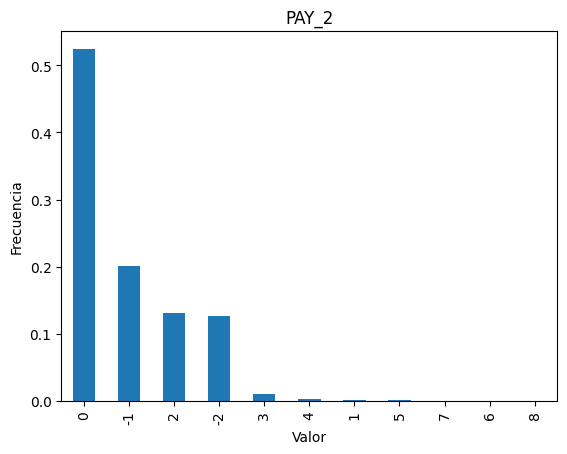

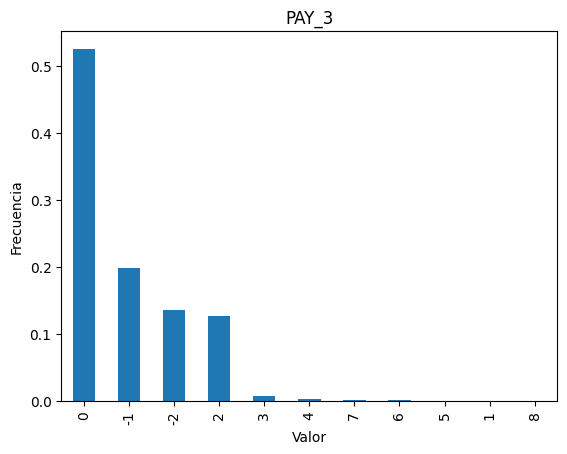

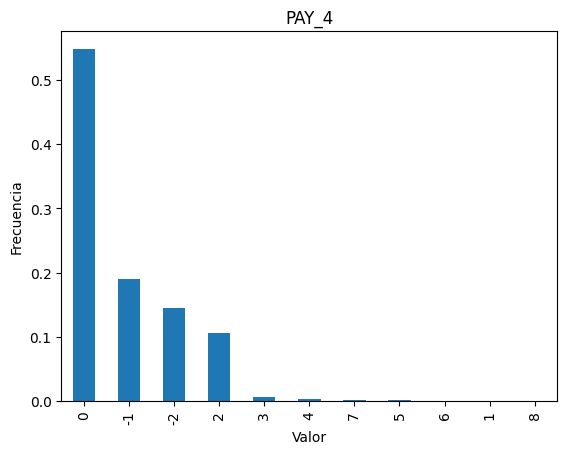

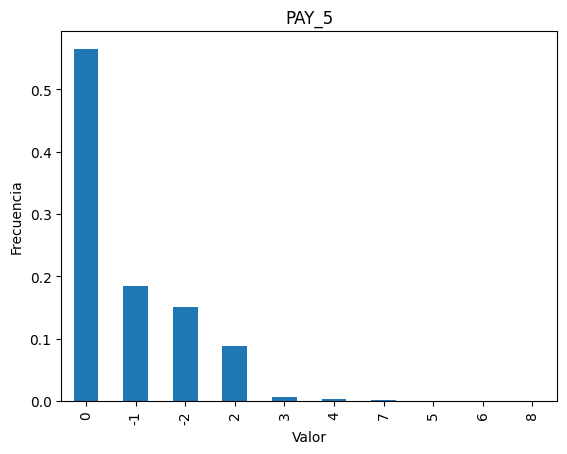

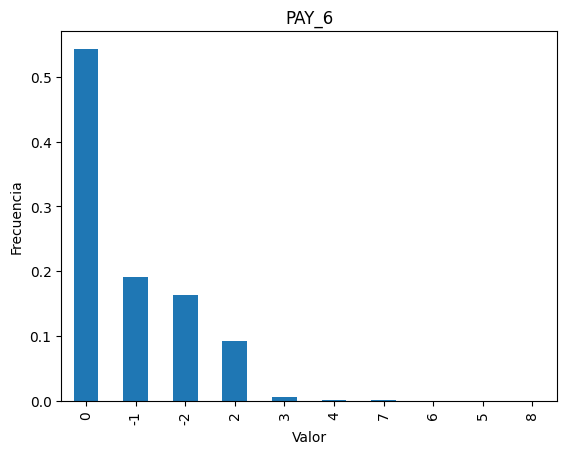

In [33]:
# Cell to view the information of categorical variables.
# Efficient: O(1) -> Due the categorical variables doesnt change

categorical_variables= ["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
# count quantity of times.
counts = {}
for col in categorical_variables:
    counts[col] = credit_data[col].value_counts(normalize=True)

for col in categorical_variables:
    plt.figure()
    counts[col].plot(kind='bar')
    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

#### Conclusion 3: there are a relation between variables status payment in their frequency appearance, but the values description aren't clear. Therefore, the best option is keep the original data

#### final conclusion: The dataset has good data quality, but the values description aren't clear. To the numerical variables with high correlation (BILLAMTX), an streategy could be calculate the median due to the nature of problem.